# Cheat sheet for EDA

**Environment preparation**

* Create Python environment
```
python -m venv env-name
```
* Run venv
```
env-name\Scripts\Activate
```
* Intall python packages
```
pip install jupyter jupyterlab pandas matplotlib requests seaborn scipy scikit-learn
```
* Run Jupyter lab
```
jupyter lab
```

## Important links

**Pandas documentation:** [https://pandas.pydata.org/docs/reference/index.html](https://pandas.pydata.org/docs/reference/index.html)

**Seaborn documentation:** [https://seaborn.pydata.org/api.html](https://seaborn.pydata.org/api.html)

## Import used packages

In [2]:
import pandas as pd # dataframes
import numpy as np # matrices and linear algebra
import matplotlib.pyplot as plt # plotting
import seaborn as sns # another matplotlib interface - styled and easier to use

# Pandas

## Read the data

In [3]:
df_full = pd.read_csv('https://raw.githubusercontent.com/rasvob/EFREI-Introduction-to-Machine-Learning/main/datasets/zsu_cv1_data.csv', sep=',')

## Show missing values counts by columns

### Show 5 first and last rows

In [4]:
df_full

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


### Show first 5 rows

In [5]:
df_full.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Show last 20 rows

In [6]:
df_full.tail(20)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1440,1441,70,RL,79.0,11526,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,191000
1441,1442,120,RM,NaN,4426,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,149300
1442,1443,60,FV,85.0,11003,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,310000
1443,1444,30,RL,NaN,8854,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2009,WD,Normal,121000
1444,1445,20,RL,63.0,8500,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2007,WD,Normal,179600
1445,1446,85,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,129000
1446,1447,20,RL,NaN,26142,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,157900
1447,1448,60,RL,80.0,10000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2007,WD,Normal,240000
1448,1449,50,RL,70.0,11767,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,5,2007,WD,Normal,112000
1449,1450,180,RM,21.0,1533,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2006,WD,Abnorml,92000


In [7]:
df_full.isna().sum().sort_values(ascending=False).head(20)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageQual        81
GarageFinish      81
GarageType        81
GarageYrBlt       81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtCond          37
BsmtQual          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
Condition2         0
dtype: int64

## Get summary of the data

In [8]:
df_full.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


#### Row and column count

In [9]:
df_full.shape

(1460, 81)

#### Datatypes of columns

In [10]:
df_full.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

#### Column names

In [11]:
df_full.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

#### Row index values

In [12]:
df_full.index

RangeIndex(start=0, stop=1460, step=1)

## Select column to Pandas Series

In [13]:
price = df_full['SalePrice'] # df_full.SalePrice
price

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

## Data filtering using .loc and .iloc

### The .iloc[] indexer works with positional indexes - very close to the way of working with the raw arrays
### The .loc[] indexer works with column names and logical expressions

### Select all rows and 3rd column of dataframe

In [14]:
df_full.iloc[:, 2]

0       RL
1       RL
2       RL
3       RL
4       RL
        ..
1455    RL
1456    RL
1457    RL
1458    RL
1459    RL
Name: MSZoning, Length: 1460, dtype: object

### Select all rows and LAST column of dataframe

In [15]:
df_full.iloc[:, -1]

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

### Select rows 15 to 22 and all columns

In [16]:
df_full.iloc[15:23, :]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
15,16,45,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,7,2007,WD,Normal,132000
16,17,20,RL,NaN,11241,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,700,3,2010,WD,Normal,149000
17,18,90,RL,72.0,10791,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,Shed,500,10,2006,WD,Normal,90000
18,19,20,RL,66.0,13695,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,159000
19,20,20,RL,70.0,7560,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,5,2009,COD,Abnorml,139000
20,21,60,RL,101.0,14215,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2006,New,Partial,325300
21,22,45,RM,57.0,7449,Pave,Grvl,Reg,Bnk,AllPub,...,0,NaN,GdPrv,NaN,0,6,2007,WD,Normal,139400
22,23,20,RL,75.0,9742,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,230000


### Select rows 15 to 22 and 3rd column

In [17]:
df_full.iloc[15:23, 3]

15     51.0
16      NaN
17     72.0
18     66.0
19     70.0
20    101.0
21     57.0
22     75.0
Name: LotFrontage, dtype: float64

## Select only a subset of columns to a new dataframe

In [18]:
df = df_full.loc[:, ['Id', 'SalePrice', 'GarageFinish', 'MSSubClass','BldgType','HouseStyle','OverallQual','OverallCond','YearBuilt','Heating','CentralAir','GrLivArea','BedroomAbvGr']].copy()
df.head()

,Id,SalePrice,GarageFinish,MSSubClass,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,Heating,CentralAir,GrLivArea,BedroomAbvGr
0,1,208500,RFn,60,1Fam,2Story,7,5,2003,GasA,Y,1710,3
1,2,181500,RFn,20,1Fam,1Story,6,8,1976,GasA,Y,1262,3
2,3,223500,RFn,60,1Fam,2Story,7,5,2001,GasA,Y,1786,3
3,4,140000,Unf,70,1Fam,2Story,7,5,1915,GasA,Y,1717,3
4,5,250000,RFn,60,1Fam,2Story,8,5,2000,GasA,Y,2198,4


### Select houses cheaper than 180k USD and with at least 2 bedrooms

In [19]:
df.loc[(df.SalePrice < 180000) & (df.BedroomAbvGr >= 2), :]

,Id,SalePrice,GarageFinish,MSSubClass,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,Heating,CentralAir,GrLivArea,BedroomAbvGr
3,4,140000,Unf,70,1Fam,2Story,7,5,1915,GasA,Y,1717,3
8,9,129900,Unf,50,1Fam,1.5Fin,7,5,1931,GasA,Y,1774,2
9,10,118000,RFn,190,2fmCon,1.5Unf,5,6,1939,GasA,Y,1077,2
10,11,129500,Unf,20,1Fam,1Story,5,5,1965,GasA,Y,1040,3
12,13,144000,Unf,20,1Fam,1Story,5,6,1962,GasA,Y,912,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1452,1453,145000,Fin,180,TwnhsE,SLvl,5,5,2005,GasA,Y,1072,2
1453,1454,84500,NaN,20,1Fam,1Story,5,5,2006,GasA,Y,1140,3
1455,1456,175000,RFn,60,1Fam,2Story,6,5,1999,GasA,Y,1647,3
1458,1459,142125,Unf,20,1Fam,1Story,5,6,1950,GasA,Y,1078,2


### Add a new column named Age for each house (current year - year built)

In [20]:
df.loc[:, 'Age'] = 2021 - df.YearBuilt

### Add a new column IsLuxury with True value for houses with more than 3 bedrooms and price above 214k USD (.loc)
- How many luxury houses are in the dataset?

In [21]:
df['IsLuxury'] = False
df.loc[(df.SalePrice > 214000) & (df.BedroomAbvGr > 3), 'IsLuxury'] = True

### Compute counts for all the heating methods (groupby / value_counts)

In [22]:
df.groupby('Heating').Heating.count()

Heating
Floor       1
GasA     1428
GasW       18
Grav        7
OthW        2
Wall        4
Name: Heating, dtype: int64

In [23]:
df.Heating.value_counts()

Heating
GasA     1428
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: count, dtype: int64

# Visualization

## Scatter plot

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

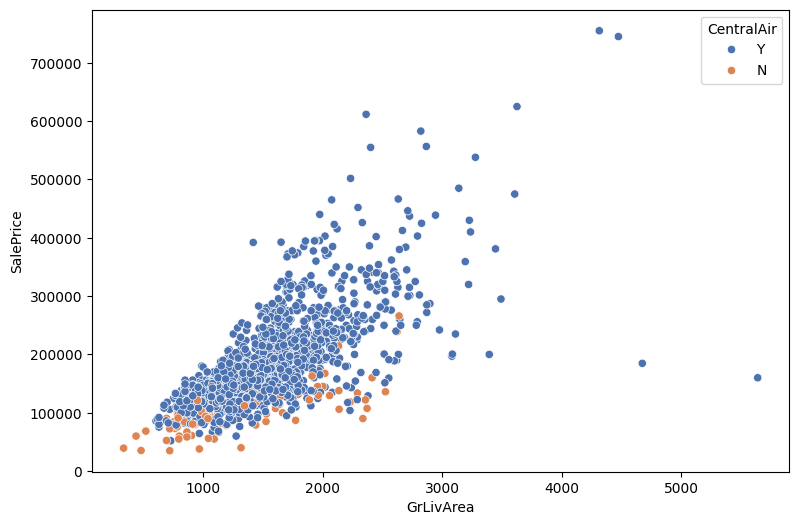

In [24]:
fig = plt.figure(figsize=((9,6)))
sns.scatterplot(data=df, x='GrLivArea', y='SalePrice', hue='CentralAir', palette='deep')

## Line plot

<Axes: xlabel='YearBuilt', ylabel='AvgSalePrice'>

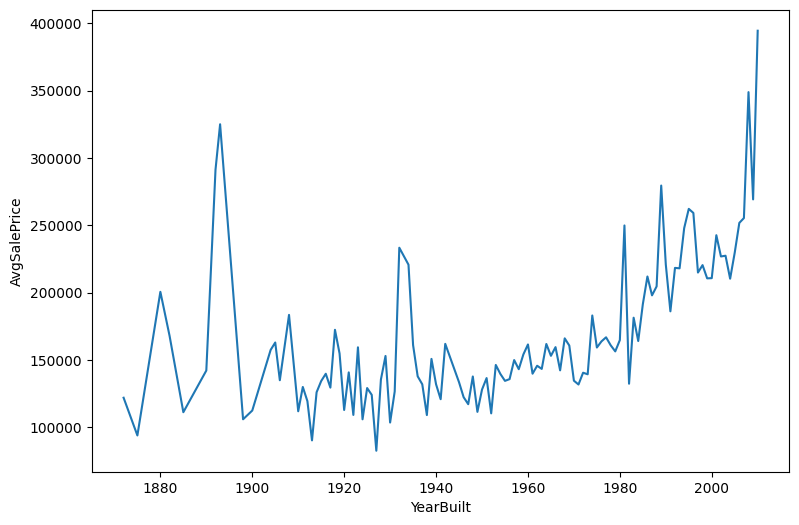

In [25]:
avg_prices = df.groupby('YearBuilt').SalePrice.mean().reset_index(name='AvgSalePrice')
plt.figure(figsize=(9,6))
sns.lineplot(data=avg_prices, x='YearBuilt', y='AvgSalePrice')

## Bar plot

In [26]:
df.loc[df.YearBuilt < 2000, 'AgeCat'] = '<2000'
df.loc[df.YearBuilt >= 2000, 'AgeCat'] = '>=2000'
df_number_of_categories = df.groupby(['BldgType', 'AgeCat']).AgeCat.count().reset_index(name='Count')
df_number_of_categories

,BldgType,AgeCat,Count
0,1Fam,<2000,912
1,1Fam,>=2000,308
2,2fmCon,<2000,31
3,Duplex,<2000,52
4,Twnhs,<2000,29
5,Twnhs,>=2000,14
6,TwnhsE,<2000,48
7,TwnhsE,>=2000,66


<Axes: xlabel='Count', ylabel='BldgType'>

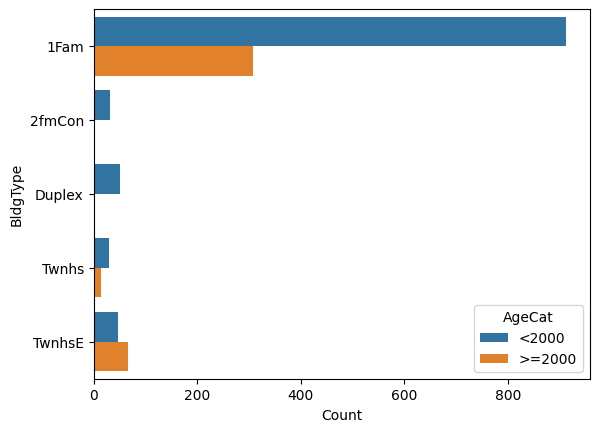

In [27]:
sns.barplot(data=df_number_of_categories, y='BldgType', x='Count', hue='AgeCat')

## Histogram

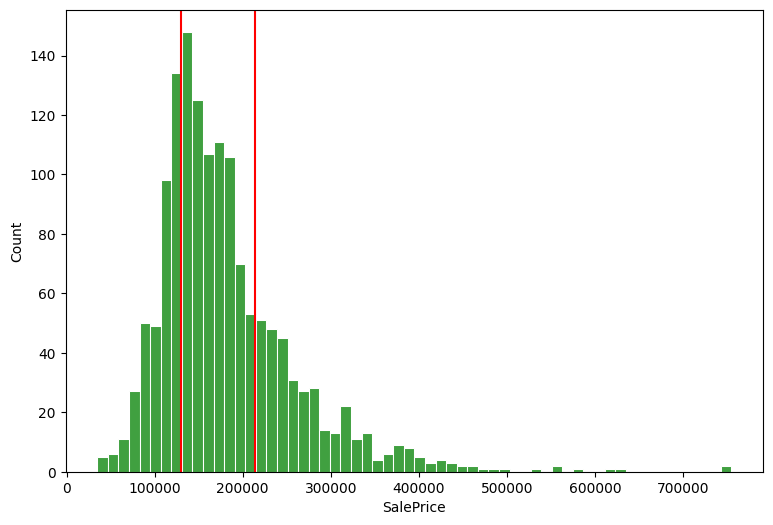

In [28]:
fig = plt.figure(figsize=(9, 6))
sns.histplot(df.SalePrice, bins=60, edgecolor='white', color='green')
plt.axvline(df.SalePrice.quantile(0.25), color='red')
plt.axvline(df.SalePrice.quantile(0.75), color='red')

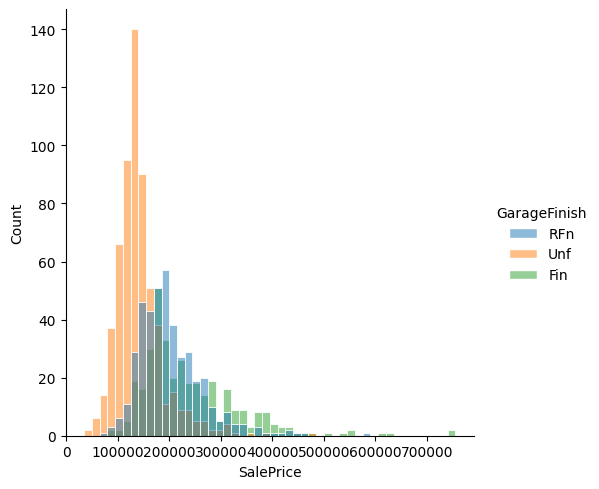

In [29]:
sns.displot(data=df, x='SalePrice', hue='GarageFinish', edgecolor='white')

## Boxplot

<Axes: xlabel='BldgType', ylabel='SalePrice'>

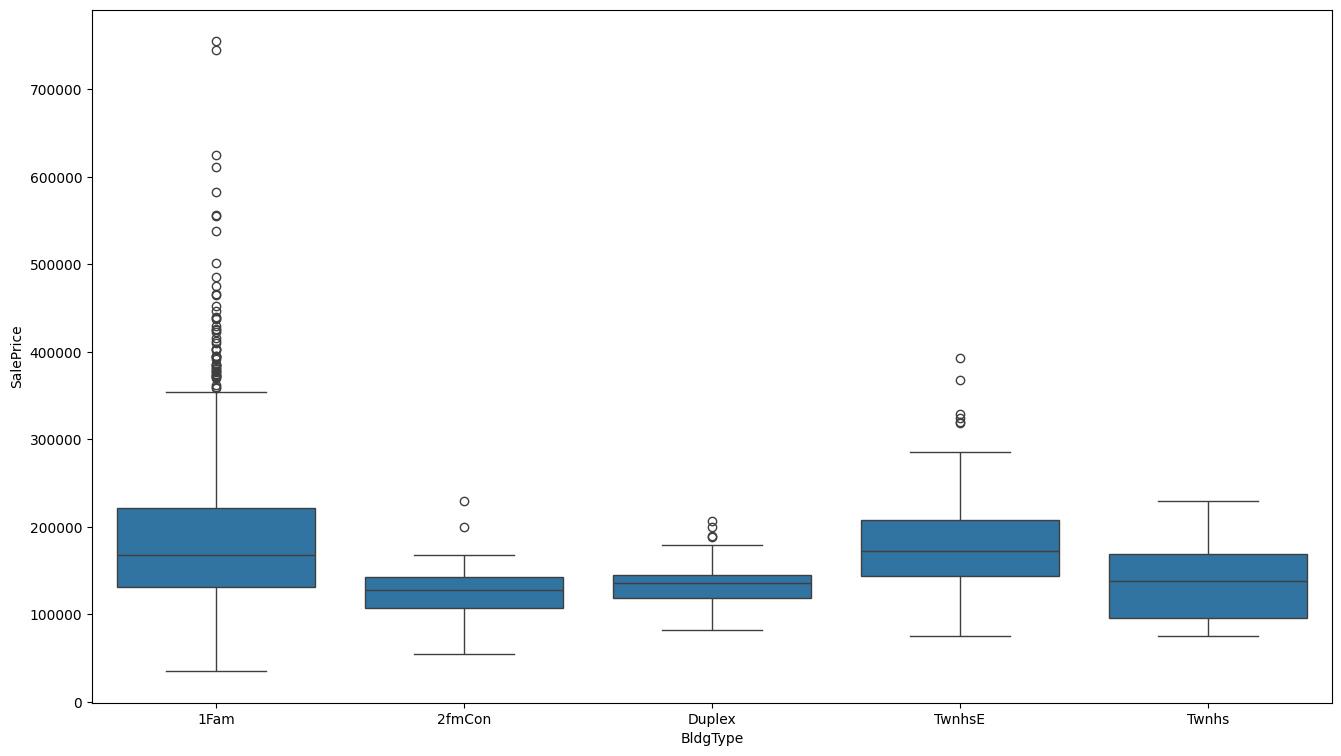

In [30]:
fig = plt.figure(figsize=(16, 9))
sns.boxplot(data=df, y='SalePrice', x='BldgType')

## Pair plot

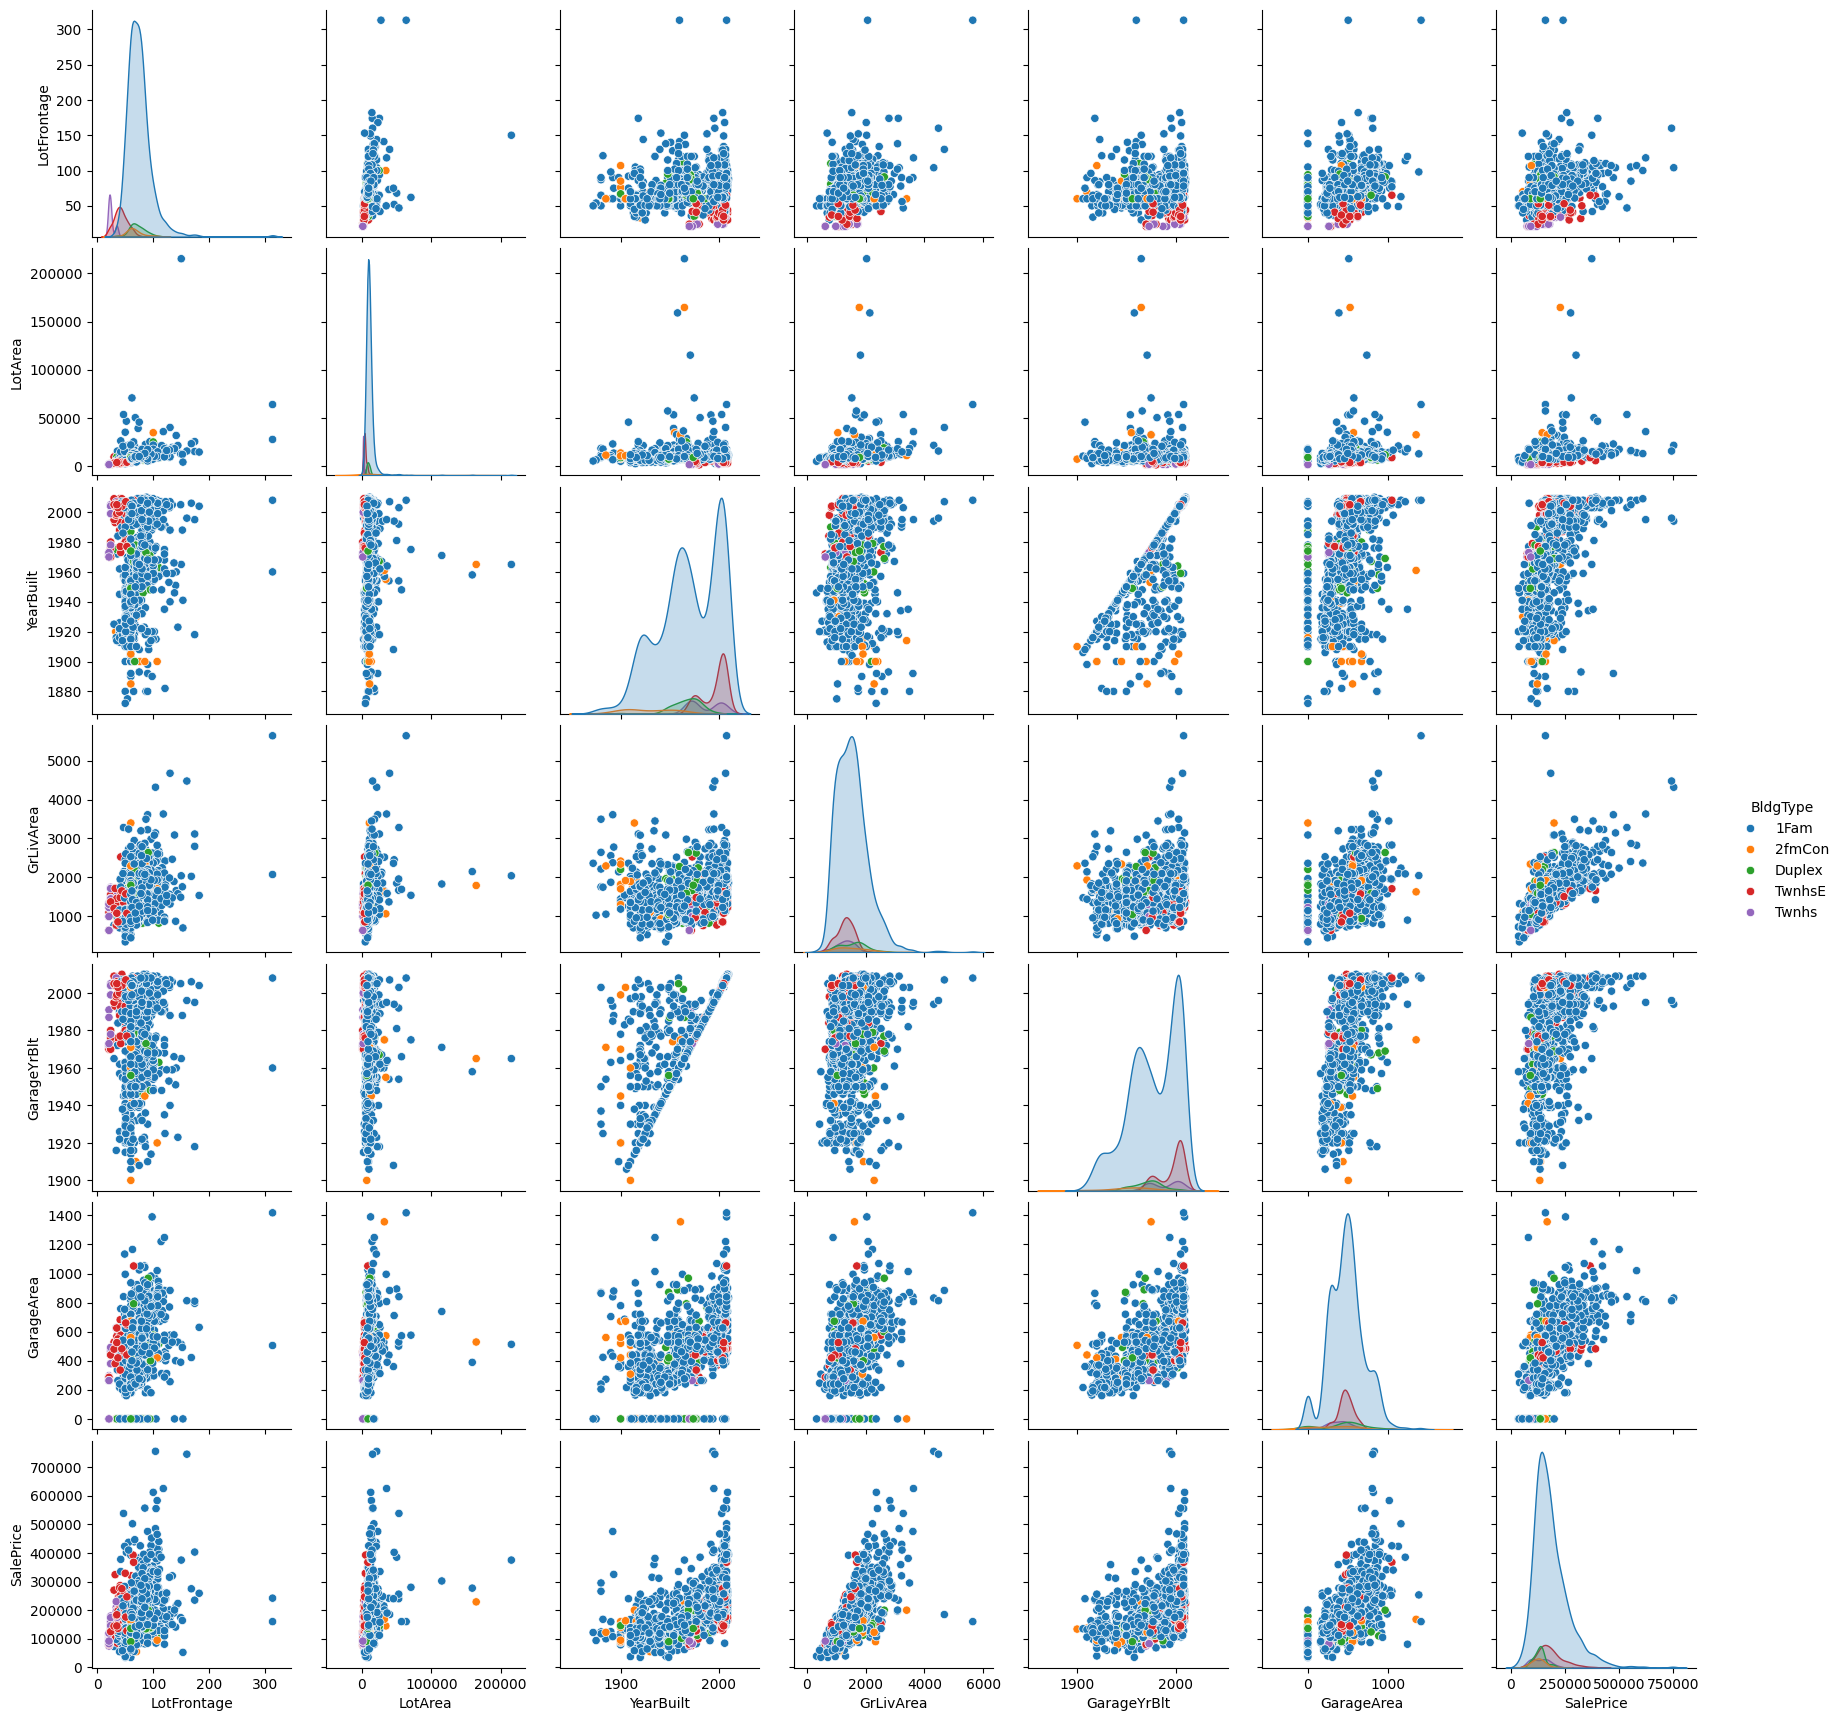

In [31]:
selected_columns = ['LotFrontage', 'LotArea', 'YearBuilt', 'GrLivArea', 'GarageYrBlt', 'GarageArea', 'SalePrice']
sns.pairplot(data=df_full, vars=selected_columns, hue='BldgType')

## Subplots

C:\Users\rasvo\AppData\Local\Temp\ipykernel_16952\1623259440.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax_left.set_xticklabels(ax_left.xaxis.get_majorticklabels(), rotation=60)
C:\Users\rasvo\AppData\Local\Temp\ipykernel_16952\1623259440.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax_right.set_xticklabels(ax_right.xaxis.get_majorticklabels(), rotation=60)
C:\Users\rasvo\AppData\Local\Temp\ipykernel_16952\1623259440.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax_left.set_xticklabels(ax_left.xaxis.get_majorticklabels(), rotation=60)
C:\Users\rasvo\AppData\Local\Temp\ipykernel_16952\1623259440.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a Fi

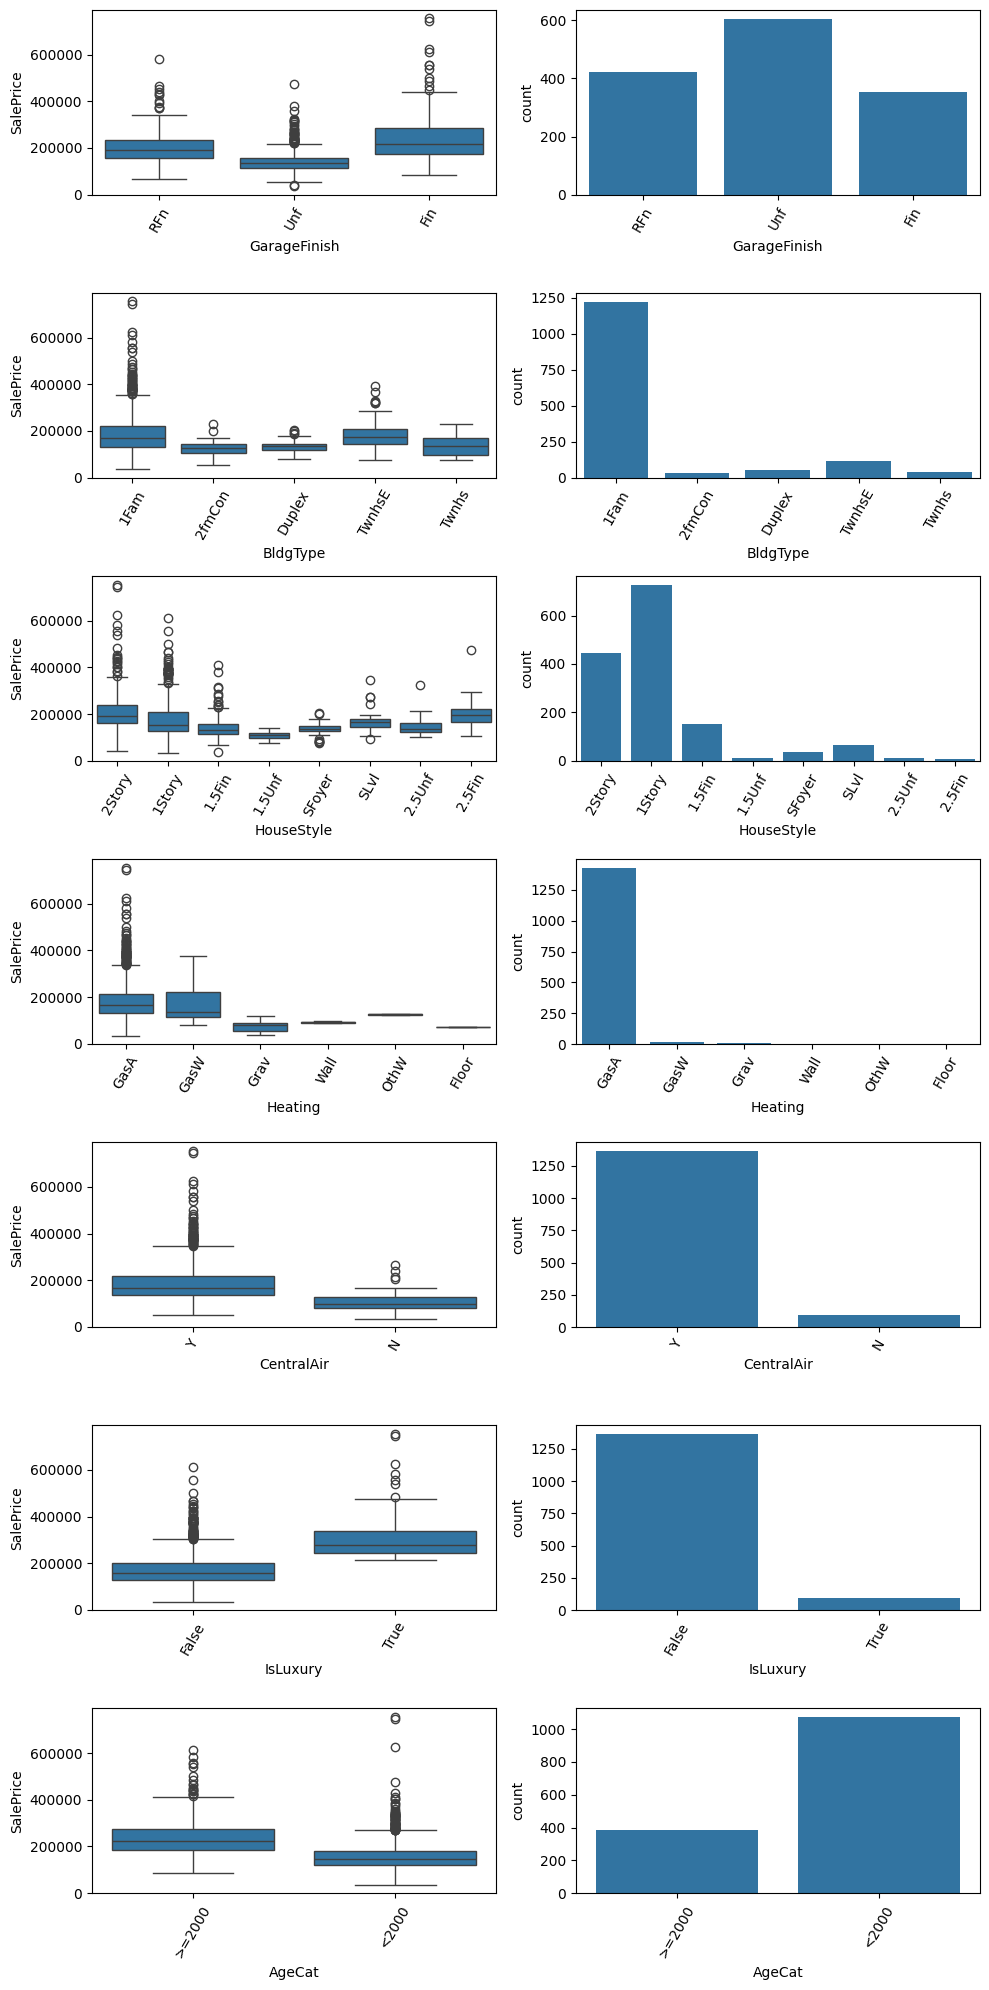

In [32]:
qualitative_columns = df.select_dtypes(exclude=np.number).columns

fig, axes = plt.subplots(len(qualitative_columns), 2, figsize=(10, 20))

for i, col in enumerate(qualitative_columns):
    ax_left = fig.axes[2*i]
    ax_right = fig.axes[2*i + 1]
    sns.boxplot(data=df, x=col, y='SalePrice', ax=ax_left)
    ax_left.set_xticklabels(ax_left.xaxis.get_majorticklabels(), rotation=60)
    sns.countplot(data=df, x=col, ax=ax_right)
    ax_right.set_xticklabels(ax_right.xaxis.get_majorticklabels(), rotation=60)
        
fig.tight_layout()

## Heatmap and correlation

In [40]:
df_corr = df.corr(numeric_only=True)
df_corr

,Id,SalePrice,MSSubClass,OverallQual,OverallCond,YearBuilt,GrLivArea,BedroomAbvGr,Age,IsLuxury
Id,1.000000,-0.021917,0.011156,-0.028365,0.012609,-0.012713,0.008273,0.037719,0.012713,-0.026877
SalePrice,-0.021917,1.000000,-0.084284,0.790982,-0.077856,0.522897,0.708624,0.168213,-0.522897,0.437004
MSSubClass,0.011156,-0.084284,1.000000,0.032628,-0.059316,0.027850,0.074853,-0.023438,-0.027850,0.010643
OverallQual,-0.028365,0.790982,0.032628,1.000000,-0.091932,0.572323,0.593007,0.101676,-0.572323,0.280773
OverallCond,0.012609,-0.077856,-0.059316,-0.091932,1.000000,-0.375983,-0.079686,0.012980,0.375983,0.019295
YearBuilt,-0.012713,0.522897,0.027850,0.572323,-0.375983,1.000000,0.199010,-0.070651,-1.000000,0.108122
GrLivArea,0.008273,0.708624,0.074853,0.593007,-0.079686,0.199010,1.000000,0.521270,-0.199010,0.520782
BedroomAbvGr,0.037719,0.168213,-0.023438,0.101676,0.012980,-0.070651,0.521270,1.000000,0.070651,0.392486
Age,0.012713,-0.522897,-0.027850,-0.572323,0.375983,-1.000000,-0.199010,0.070651,1.000000,-0.108122
IsLuxury,-0.026877,0.437004,0.010643,0.280773,0.019295,0.108122,0.520782,0.392486,-0.108122,1.000000


<Axes: >

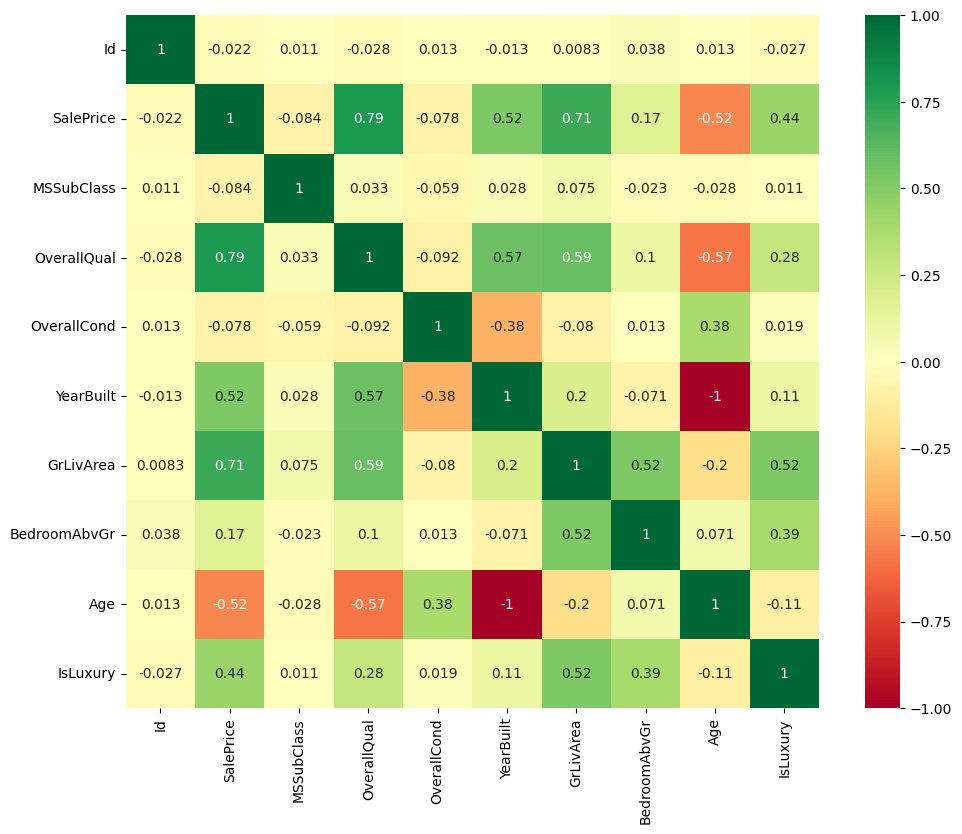

In [41]:
plt.figure(figsize=(12, 9))
sns.heatmap(df_corr, square=True, cmap='RdYlGn', vmin=-1, vmax=1, annot=True)

## Regression line in scatter plot

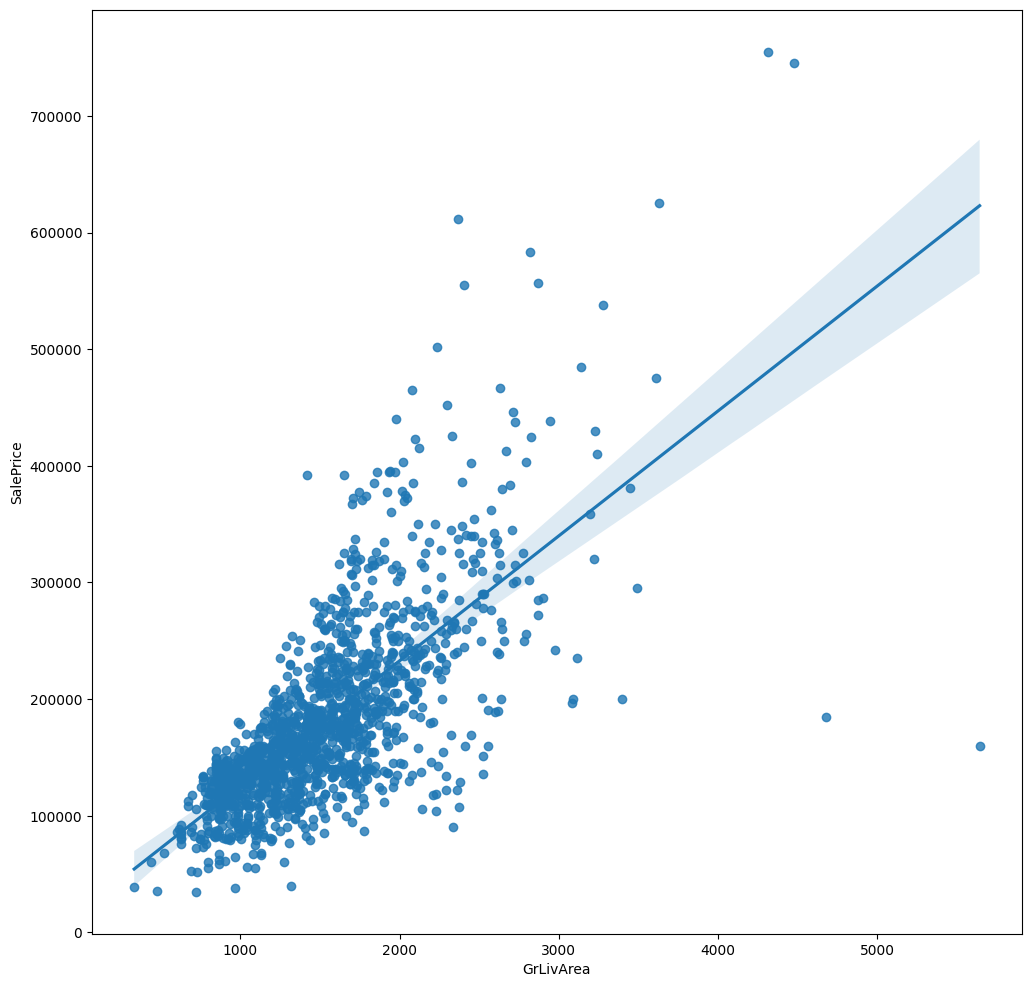

In [34]:
fig = plt.figure(figsize=(12, 12))
sns.regplot(data = df, x='GrLivArea', y='SalePrice')
plt.show()